In [1]:
# importing required libraries
import pandas as pd
# To display all the columns
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data from excel
# https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh/#
train= pd.read_excel("Data_Train.xlsx")

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We dont see any null values

In [6]:
# Checking for unique values in Duration
train.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
32h 20m      1
35h 35m      1
27h 30m      1
37h 10m      1
29h 30m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
# Checking for total no. of null values in train
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Exploratory Data Analysis

In [9]:
# Extracting the day information from Date of Journey.
train['Journey_day']=pd.to_datetime(train.Date_of_Journey,format='%d/%m/%Y').dt.day

In [11]:
# Extracting the month information from Date of Journey.
train['Journey_month']=pd.to_datetime(train.Date_of_Journey,format='%d/%m/%Y').dt.month

In [13]:
# Removing the column since it has redundant information.
train.drop('Date_of_Journey', axis=1,inplace=True)

In [15]:
# Extracting the hour information from Dep time.
train['Dep_hour']= pd.to_datetime(train.Dep_Time).dt.hour
# Extracting the minute information from Dep time.
train['Dep_min']= pd.to_datetime(train.Dep_Time).dt.minute
# Removing the column since it has redundant information.
train.drop('Dep_Time', axis=1,inplace=True)

In [16]:
train.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [17]:
# Extracting the hour information from Arrival time.
train['Arrival_hour']= pd.to_datetime(train.Arrival_Time).dt.hour
# Extracting the minute information from Arrival time.
train['Arrival_min']= pd.to_datetime(train.Arrival_Time).dt.minute
# Removing the column since it has redundant information.
train.drop('Arrival_Time', axis=1,inplace=True)

In [18]:
train.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [53]:
"2h 50m".split(sep='m')[0].split()[-1]

'50'

In [44]:
# Extracting the hours and minutes in the Duration column
durationlist=list(train["Duration"])
for i in range(len(durationlist)):
    if len(durationlist[i].split())!=2:
        if 'h' in durationlist[i]:
            durationlist[i]=durationlist[i].strip()+' 0m'
        else:
            durationlist[i]= '0h '+durationlist[i]
duration_hours=[]
duration_mins=[]
for i in range(len(durationlist)):
    hours=int(durationlist[i].split(sep='h')[0])
    duration_hours.append(hours)
    mins=int(durationlist[i].split(sep='m')[0].split()[-1])
    duration_mins.append(mins)

In [46]:
# Inserting the data into the train dataframe
train["Duration_hours"] = duration_hours
train["Duration_mins"] = duration_mins
# Removing the column since it has redundant information.
train.drop('Duration', axis=1,inplace=True)

In [49]:
train.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


# Categorical Data

In [54]:
train.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

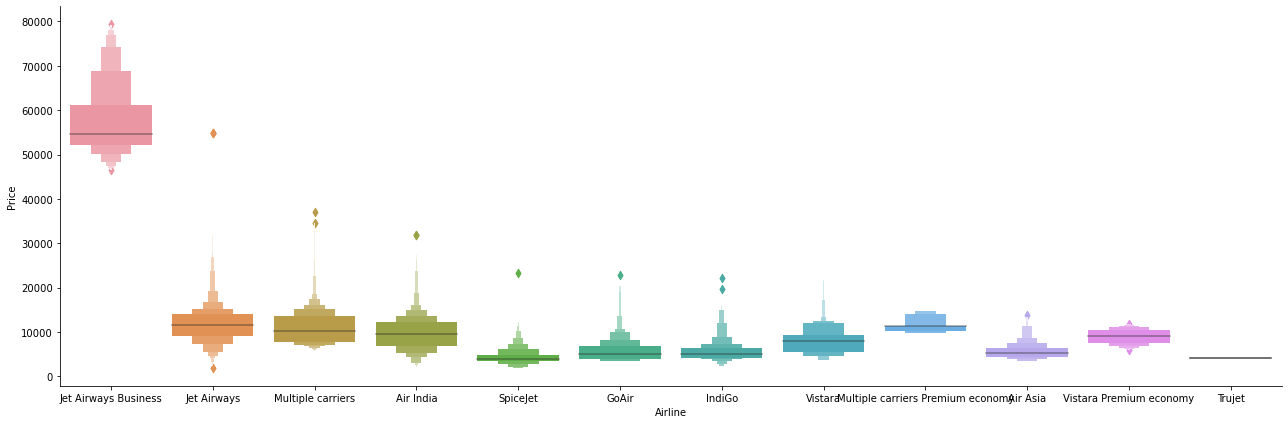

In [55]:
# Using catplot to show the relationship between categorical and numerical features
sns.catplot(x= "Airline",y="Price",data=train.sort_values("Price", ascending=False),kind='boxen',height= 6,aspect=3)
plt.show()

From the above we can see that jet Airways Business has a lot higher price when compared to other airlines

In [58]:
# Performing OneHotEncoding since Airline is a nominal categorical data
airline=train[["Airline"]]
airline=pd.get_dummies(airline,drop_first=True)
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [60]:
# Checking the sources values
train.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

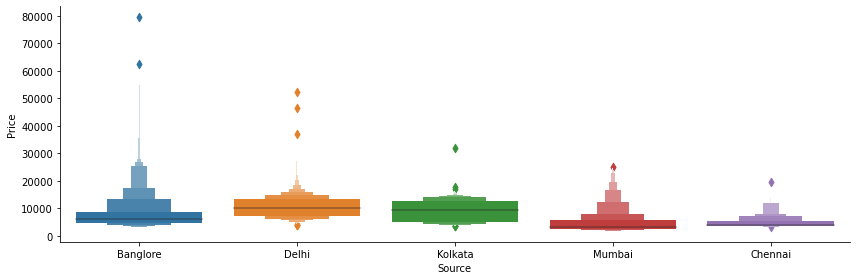

In [61]:
# Using catplot to show the relationship between categorical and numerical features
sns.catplot(x= "Source",y="Price",data=train.sort_values("Price", ascending=False),kind='boxen',height= 4,aspect=3)
plt.show()

In [62]:
# OneHotEncoding for Source
source=train[['Source']]
source=pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [63]:
train.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [64]:
# OneHotEncoding for Destination
dest=train[['Destination']]
dest=pd.get_dummies(dest,drop_first=True)
dest.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


If we look closely, the Route and total stops convey the same information. So, we can drop the Route column altogether.

In [67]:
train.drop(["Route","Additional_Info"], axis=1, inplace=True)

In [69]:
train.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [70]:
# Since the Total_Stops has incremental/ordered values, we will use Label Encoder.
train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True)

In [71]:
train.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25


In [72]:
# Combining all data

traindata=pd.concat([train,airline,source,dest], axis=1)

In [73]:
traindata.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [74]:
# We will drop Airline, Source and Destination
traindata.drop(["Airline",'Source','Destination'],axis=1,inplace=True)

In [76]:
traindata.head(2)

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [77]:
traindata.shape

(10682, 30)

In [84]:
test=pd.read_excel("Test_set.xlsx")

In [85]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [86]:
# Preprocessing of the test data using the similar steps

test.dropna(inplace = True)
print(test.isnull().sum())

# EDA

# Date_of_Journey
test["Journey_day"] = pd.to_datetime(test.Date_of_Journey, format="%d/%m/%Y").dt.day
test["Journey_month"] = pd.to_datetime(test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test["Dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour
test["Dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute
test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test["Arrival_hour"] = pd.to_datetime(test.Arrival_Time).dt.hour
test["Arrival_min"] = pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

# Adding Duration column to test set
test["Duration_hours"] = duration_hours
test["Duration_mins"] = duration_mins
test.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

airline = pd.get_dummies(test["Airline"], drop_first= True)

source = pd.get_dummies(test["Source"], drop_first= True)

dest = pd.get_dummies(test["Destination"], drop_first = True)

test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe
testdata = pd.concat([test, airline, source, dest], axis = 1)

testdata.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

testdata.shape

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


(2671, 28)

In [87]:
traindata.head(1)

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [88]:
testdata.head(1)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [89]:
x=traindata.drop("Price", axis=1)
y=traindata['Price']

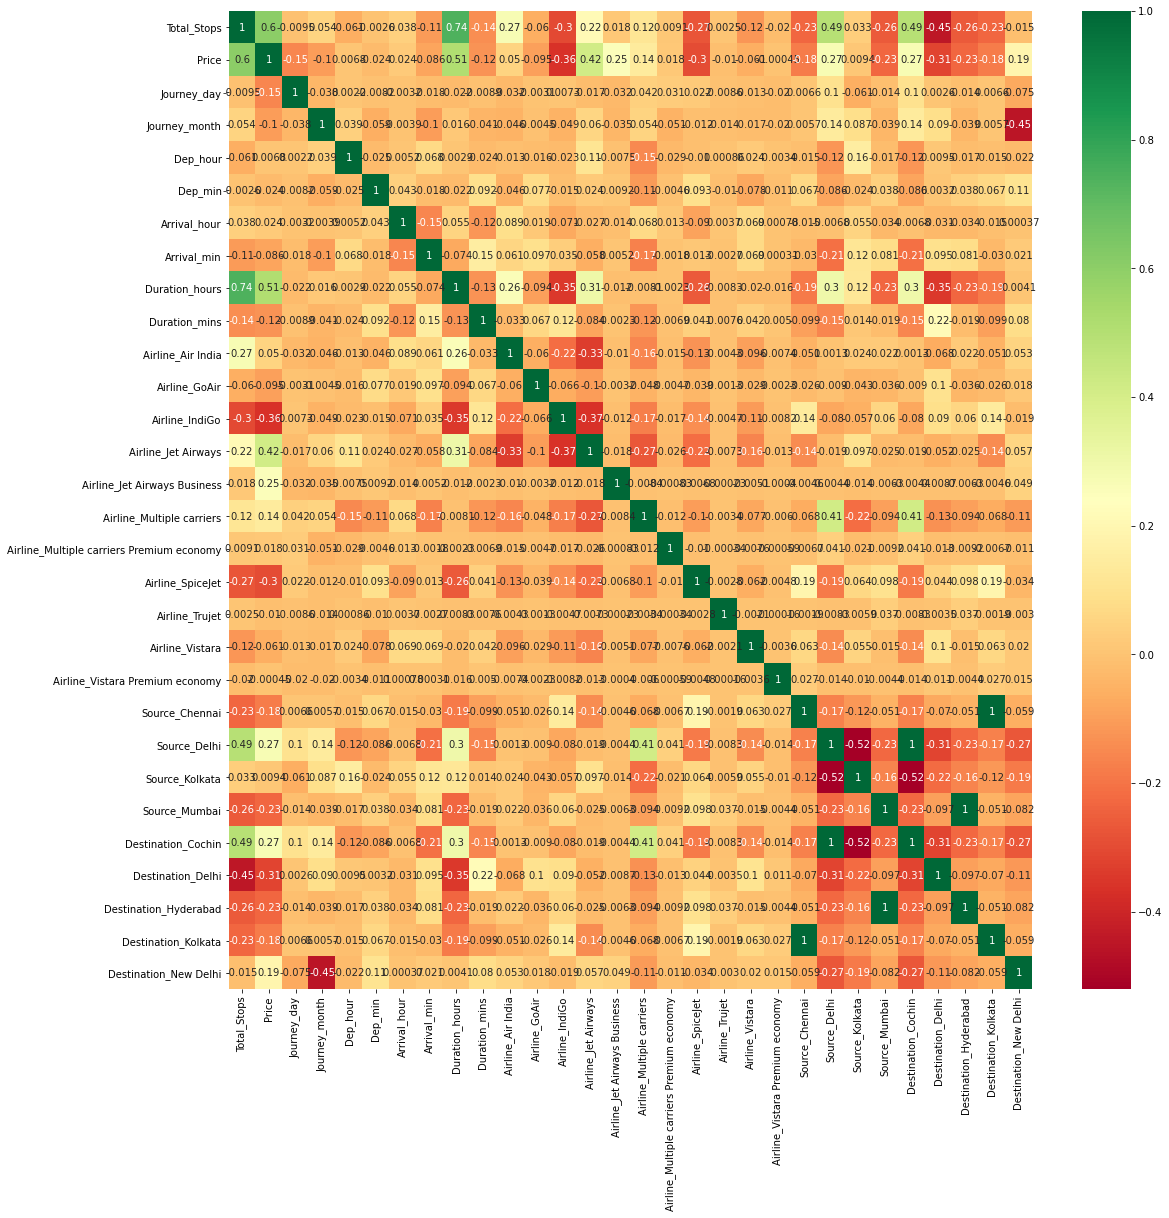

In [92]:
# heatmap to find the correlation between features
plt.figure(figsize=(18,18))
sns.heatmap(traindata.corr(), annot=True, cmap="RdYlGn")
plt.show()

From the above we can see that the features that are more green are positively correlated whereas the red ones are negatively correlated.

In [93]:
# Extracting the important features using the ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
reg=ExtraTreesRegressor()
reg.fit(x,y)

ExtraTreesRegressor()

In [94]:
reg.feature_importances_

array([2.45968597e-01, 1.43635261e-01, 5.34556232e-02, 2.50550596e-02,
       2.08343773e-02, 2.67633680e-02, 1.95774461e-02, 1.06611740e-01,
       1.73425204e-02, 9.03155169e-03, 2.06752722e-03, 1.74779756e-02,
       1.41943012e-01, 6.76051587e-02, 1.92026810e-02, 8.42176251e-04,
       3.42904418e-03, 1.07110232e-04, 5.00174158e-03, 8.13329639e-05,
       4.96460241e-04, 1.33817063e-02, 3.08286277e-03, 5.67776778e-03,
       7.74364463e-03, 1.09895578e-02, 7.06175257e-03, 4.91695654e-04,
       2.50412480e-02])

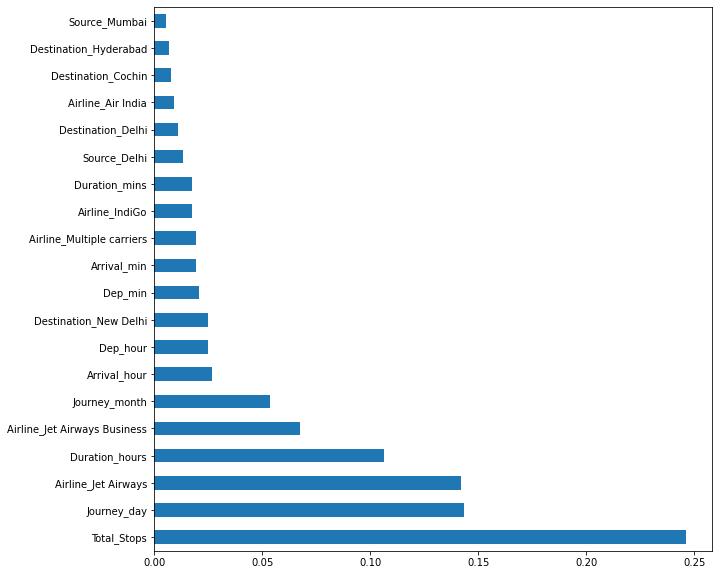

In [95]:
# Visualizing the important features

plt.figure(figsize=(10,10))
impfeat=pd.Series(reg.feature_importances_, index=x.columns)
impfeat.nlargest(20).plot(kind='barh')
plt.show()

In [126]:
traindata.to_csv("traindata.csv",index=False)
testdata.to_csv("testdata.csv",index=False)

In [ ]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte= train_test_split(x,y,test_size=0.2)

# linear Regression Model Fit

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
lin= LinearRegression()
lin.fit(xtr,ytr)

LinearRegression()

In [130]:
# trained weights
lin.coef_

array([ 2.76072446e+03, -7.47755998e+01, -3.94172621e+02,  2.32262356e+01,
       -1.27923486e+00, -6.98222198e+00,  4.11368972e-02, -3.11832406e+00,
       -1.37085409e+00,  1.73074598e+03,  1.21774338e+02,  3.12884698e+02,
        4.39623413e+03,  4.75800093e+04,  3.73545756e+03,  3.94770566e+03,
       -2.29605974e+02, -2.49256660e+03,  2.33048783e+03,  2.95990636e+03,
        6.55912408e+00,  2.52530800e+01, -5.53478410e+01, -9.01333388e+02,
        2.52530800e+01, -8.53093548e+02, -9.01333388e+02,  6.55912408e+00,
        1.77796257e+03])

In [131]:
# intercept term
lin.intercept_

7150.946083053577

In [132]:
# R^2 value on training data
lin.score(xtr,ytr)

0.6363702564952727

In [133]:
# R^2 value on testing data
lin.score(xte,yte)

0.569438719165627

In [134]:
# Apply cross validation
from sklearn.model_selection import cross_val_score

In [135]:
cross_score=cross_val_score(lin,x,y,cv=5)

In [136]:
cross_score.mean()

0.6199027318916419

In [137]:
# Data for coefficients
coeff_data = pd.DataFrame(lin.coef_,index=x.columns,columns=['Coefficient'])

In [138]:
coeff_data

,Coefficient
Total_Stops,2760.724461
Journey_day,-74.775600
Journey_month,-394.172621
Dep_hour,23.226236
Dep_min,-1.279235
Arrival_hour,-6.982222
Arrival_min,0.041137
Duration_hours,-3.118324
Duration_mins,-1.370854
Airline_Air India,1730.745983


In [139]:
ypred=lin.predict(xte)

In [140]:
loss= yte-ypred

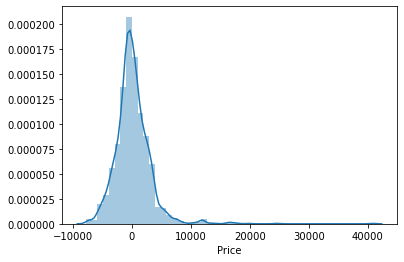

In [141]:
sns.distplot(loss)

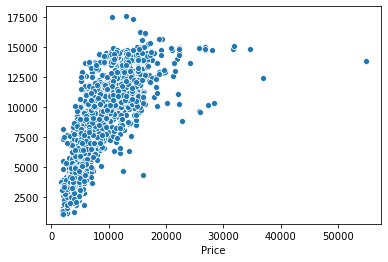

In [142]:
sns.scatterplot(yte,ypred)

In [143]:
mae= metrics.mean_absolute_error(yte,ypred)
mse= metrics.mean_squared_error(yte,ypred)
rmse=np.sqrt(metrics.mean_squared_error(yte,ypred))

In [144]:
print(mae,mse,rmse)

2025.6840562756145 8995852.679466726 2999.3087002618995


In [145]:
# Saving the model
file=open('Linear_regression_model.pkl','wb')
pickle.dump(lin,file)

# Ridge Regression Model Fit

In [146]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [147]:
ridge=Ridge()
param= {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,60,70,80,100]}
ridge_reg= GridSearchCV(estimator=ridge,param_grid=param, scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(x,y)

/home/adityarathore/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.37644e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/adityarathore/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.13919e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/adityarathore/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.1678e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/adityarathore/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.14379e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/adityarathore/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarni

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 60, 70, 80, 100]},
             scoring='neg_mean_squared_error')

In [148]:
ridge_reg.best_params_

{'alpha': 0.01}

In [149]:
ridge_reg.best_score_

-8072974.475008899

In [150]:
ridgepred=ridge_reg.predict(xte)

In [151]:
ridgeloss= yte-ridgepred

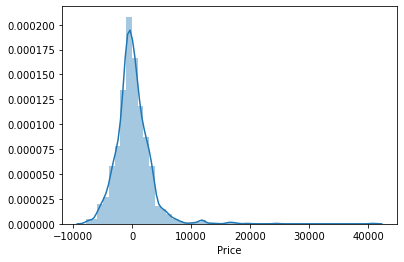

In [152]:
sns.distplot(ridgeloss)

In [153]:
# Saving the model
file= open("ridgereg.pkl",'wb')
pickle.dump(ridge_reg,file)

# Lasso Regression Model Fit

In [155]:
from sklearn.linear_model import Lasso

In [157]:
lasso=Lasso()
lasso_reg=GridSearchCV(estimator=lasso,param_grid=param,scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(x,y)

/home/adityarathore/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33097231858.99183, tolerance: 17933681.09419209
  model = cd_fast.enet_coordinate_descent(
/home/adityarathore/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34193006791.557133, tolerance: 17990789.06961287
  model = cd_fast.enet_coordinate_descent(
/home/adityarathore/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34067095945.08844, tolerance: 18182450.076523144
  model = cd_fast.enet_coordinate_descent(
/home/adityarathore/anaconda3/lib/python3.8/site-packages/skle

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 60, 70, 80, 100]},
             scoring='neg_mean_squared_error')

In [158]:
lasso_reg.best_params_

{'alpha': 0.01}

In [159]:
lasso_reg.best_score_

-8073110.257385383

From the above, we can say that both models performed really bad although ridge regression was slightly better than the lasso. This indicates that linear models would not be able to achieve the task in hand.

In [160]:
lassopred= lasso_reg.predict(xte)

In [161]:
lassoloss=yte-lassopred

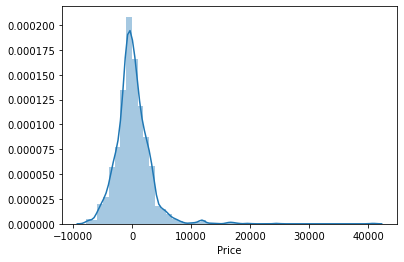

In [163]:
sns.distplot(lassoloss)

In [164]:
file= open("lassoreg.pkl",'wb')
pickle.dump(lasso_reg,file)

# Random Forest Model Fit

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
rf=RandomForestRegressor()
rf.fit(xtr,ytr)

RandomForestRegressor()

In [100]:
ypred=rf.predict(xte)

In [101]:
# R^2 Score on the training set
rf.score(xtr,ytr)

0.9557926823868204

In [102]:
# R^2 Score on the testing set
rf.score(xte,yte)

0.8105521750487998

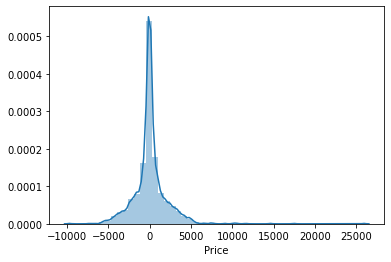

In [103]:
# Plotting the distribution of error
sns.distplot(yte-ypred)
plt.show()

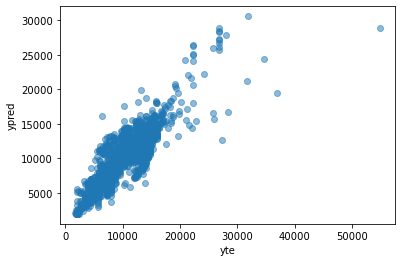

In [106]:
plt.scatter(yte, ypred, alpha = 0.5)
plt.xlabel("yte")
plt.ylabel("ypred")
plt.show()

In [105]:
from sklearn import metrics

In [107]:
print('MAE:', metrics.mean_absolute_error(yte, ypred))
print('MSE:', metrics.mean_squared_error(yte, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(yte, ypred)))

MAE: 1212.0572413680143
MSE: 3958193.17613462
RMSE: 1989.5208408394772


# Hyperparameter Tuning

In [109]:
# Finding the right hgyperparamter using RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [110]:
# Hyperparameters of Randomforest Model

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [111]:
# Random Grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [112]:
# We will use 5-fold cross validation
rf_rand=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',cv=5,n_jobs=1,verbose=2)

In [113]:
rf_rand.fit(xtr,ytr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=   8.9s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=   8.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=   8.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=   8.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=   8.7s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30, total=   2.0s
[CV] n_estimators=200, min_samples_split=15

[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  10.9s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  10.9s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  10.7s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  10.8s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  10.8s
[CV] n_estimators=900, min_samples_split=10

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [114]:
# Best hyperparameters for the model
rf_rand.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

In [116]:
# New prediction using the tuned model
ypred2 = rf_rand.predict(xte)

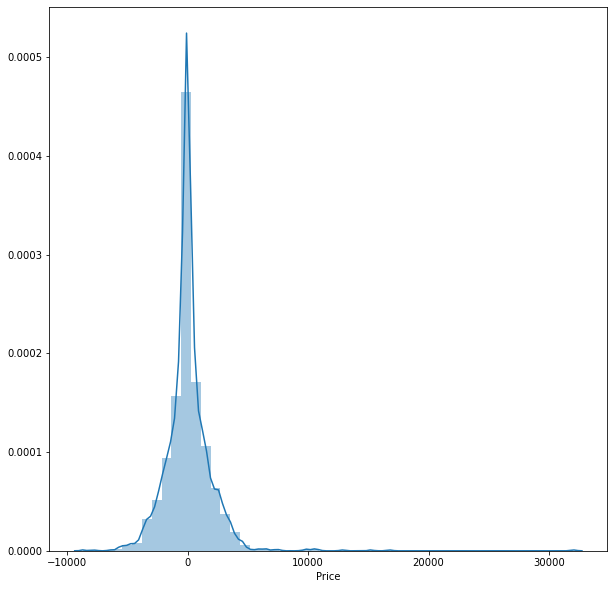

In [117]:
# Distribution of the new error
plt.figure(figsize = (10,10))
sns.distplot(yte-ypred2)
plt.show()

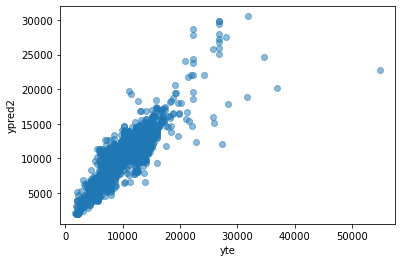

In [118]:
plt.scatter(yte, ypred2, alpha = 0.5)
plt.xlabel("yte")
plt.ylabel("ypred2")
plt.show()

In [119]:
print('MAE:', metrics.mean_absolute_error(yte, ypred2))
print('MSE:', metrics.mean_squared_error(yte, ypred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(yte, ypred2)))

MAE: 1167.010873675715
MSE: 3661955.787449219
RMSE: 1913.6237319413706


# Saving the model

In [120]:
import pickle
file = open('flight_pred.pkl', 'wb')
pickle.dump(rf_rand, file)

In [121]:
model = open('flight_pred.pkl','rb')
rfmod = pickle.load(model)

In [122]:
prediction = rfmod.predict(xte)

In [123]:
metrics.r2_score(yte, prediction)

0.8247307475586131